<a href="https://colab.research.google.com/github/Nonbangkok/AstroCode/blob/main/astrocode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  โจทย์ข้อ 2. กฎของฮับเบิลและการประมาณอายุของเอกภพ
    
นายกิตติธัช ทิพย์มณฑา ม.5 โรงเรียนเบญจมราชูทิศ (nonbangkokgamer@gmail.com) [Kittitouch Thipmontha] \
นายธนกฤต โพธิ์นิ่มไทย ม.5 โรงเรียนดรุณสิกขาลัย (jadai.tk007@gmail.com) [Thanakrit Ponimthai] \
นางสาวนวินดา เลิศเพ็ญเมธา ม.5 โรงเรียนดรุณสิกขาลัย (tanyaporn.kes@gmail.com) [Navinda Lertpenmetha] \
ครูที่ปรึกษา: ผศ.ดร. เอกพงษ์ หิรัญสิริสวัสดิ์  โรงเรียนดรุณสิกขาลัย (ekapong.hir@kmutt.ac.th) [Ekapong Hirunsirisawat]

## Install nescessory library

In [1]:
!pip install sortedcontainers
!pip install sklearn
!pip install matplotlib
!pip install scipy
!pip install pandas
!pip install numpy
!pip install requests

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


## Import necessary library

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sortedcontainers import SortedList
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import requests

## Get data from link google drive

In [3]:
url = 'https://drive.google.com/file/d/1DeceWp9HT1cjBx0AMoOXQ8WSSd5c26ck/view'

file_id = url.split('/')[-2]

download_url = f'https://drive.google.com/uc?id={file_id}&export=download'

response = requests.get(download_url)

if response.status_code == 200:
    data = response.json()
    df = pd.DataFrame(data)
else:
    print(f"Error: {response.status_code} - Unable to download JSON file")

df['m'] = data['Apparent Magitude (m)']
df['M'] = data['Absolute Magnitude (M)']
df['z'] = data['Redshift (z)']

df

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676
1,16.756129,-18.177730,0.022604,16.756129,-18.177730,0.022604
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038
3,16.294575,-19.512265,0.036352,16.294575,-19.512265,0.036352
4,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395
5,14.182569,-21.249230,0.033587,14.182569,-21.249230,0.033587
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448
7,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838
8,15.998251,-19.397655,0.030485,15.998251,-19.397655,0.030485
9,17.910487,-16.931928,0.025338,17.910487,-16.931928,0.025338


## Calculate distance and recession valocity of galaxy



In [4]:
v_light = 299792458 # constant speed of light in m/s

df['d'] = pow(10, (df['m'] - df['M'] + 5) / 5) # distance = 10^((m - M + 5) / 5), m = Apparent Magitude, M = Absolute Magnitude
df['v'] = df['z'] * v_light # recession velocity of galaxy = z * c; c = speed of light, z = redshift
df['v'] /= 1e3; # transform unit from m/s to km/s
df['d'] /= 1e6 # transform unit from pc to Mpc

df # print dataFrame for easy to debug

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z,d,v
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676,15.0,1102.027175
1,16.756129,-18.177730,0.022604,16.756129,-18.177730,0.022604,97.0,6776.580838
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038,32.0,2409.687714
3,16.294575,-19.512265,0.036352,16.294575,-19.512265,0.036352,145.0,10897.970095
4,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395,50.0,3116.199574
5,14.182569,-21.249230,0.033587,14.182569,-21.249230,0.033587,122.0,10069.014985
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448,58.0,4331.291811
7,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838,91.0,5347.696740
8,15.998251,-19.397655,0.030485,15.998251,-19.397655,0.030485,120.0,9139.257376
9,17.910487,-16.931928,0.025338,17.910487,-16.931928,0.025338,93.0,7596.218815


## Plot chart of distance and recession velocity

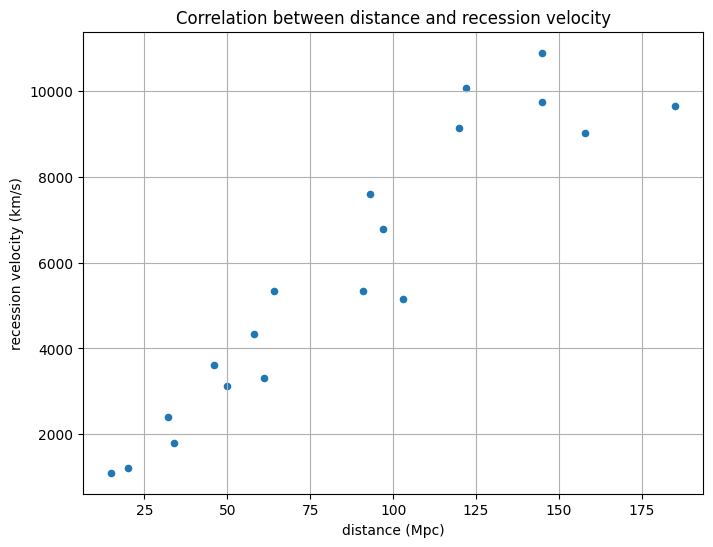

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(df['d'], df['v'], s=20)
plt.xlabel('distance (Mpc)')
plt.ylabel('recession velocity (km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)
plt.show()

## Linear regression for calculate Hubble constant

Slope(H0): 65.6299463885447
Error(MSE): 1259379.1688940628
Error(H0): 5.974288841626507
Standard Error of the Slope: 5.6122455960570115


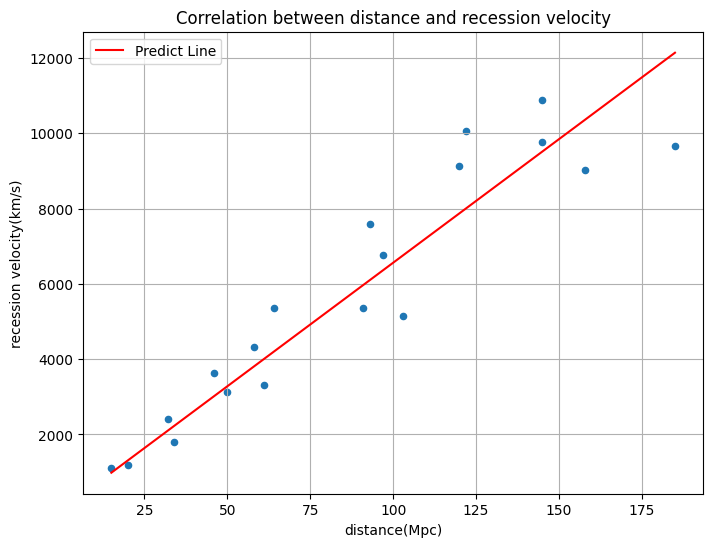

In [6]:
# do linear regression and find slope of predict line for H0
plt.figure(figsize = (8, 6))
plt.scatter(df['d'], df['v'],  s = 20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

X = df[['d']].values
y = df['v'].values
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
x_range = np.linspace(df['d'].min(), df['d'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Predict Line')

True_Hubble = 69.8
slope = model.coef_[0]
errorMSE = mean_squared_error(y, model.predict(X))
errorH0 = abs(True_Hubble - slope)/True_Hubble * 100

residuals = y - model.predict(X)
std_err_regression = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
std_err_slope = std_err_regression / np.sqrt(np.sum((X[:, 0] - np.mean(X[:, 0]))**2))

print(f"Slope(H0): {slope}")
print(f"Error(MSE): {errorMSE}")
print(f"Error(H0): {errorH0}")
print(f"Standard Error of the Slope: {std_err_slope}")

plt.legend()
plt.show()

## Calculate age of universe

In [7]:
second = 1 / (slope * (1 / ( 3.086 * pow(10, 19)))) # transform unit from km/s/Mpc to s
age_of_universe = second / 31536000 # transform unit from s to year
print(f"age of universe is {age_of_universe} year or {age_of_universe / 1e9 :.2f} Billion Years")

age of universe is 14910330336.48459 year or 14.91 Billion Years


## Find outllier

In [8]:
# use IQR to find outlier
Q1 = df['d'].quantile(0.25)
Q3 = df['d'].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

outliers = df[(df['d'] > upper_bound) | (df['d'] < lower_bound)]

print("Outliers:")
print(outliers)

# No outliers

Outliers:
Empty DataFrame
Columns: [Apparent Magitude (m), Absolute Magnitude (M), Redshift (z), m, M, z, d, v]
Index: []


## Discussion

In [9]:
# sort the data with distance
new = df.sort_values(by='d', ascending=True)
new.reset_index(drop=True, inplace=True)
new

,Apparent Magitude (m),Absolute Magnitude (M),Redshift (z),m,M,z,d,v
0,14.541391,-16.339065,0.003676,14.541391,-16.339065,0.003676,15.0,1102.027175
1,15.192141,-16.313009,0.004011,15.192141,-16.313009,0.004011,20.0,1202.413144
2,15.829605,-16.696145,0.008038,15.829605,-16.696145,0.008038,32.0,2409.687714
3,14.147030,-18.510365,0.006022,14.147030,-18.510365,0.006022,34.0,1805.439097
4,14.504531,-18.809258,0.012081,14.504531,-18.809258,0.012081,46.0,3621.882445
5,13.829094,-19.665756,0.010395,13.829094,-19.665756,0.010395,50.0,3116.199574
6,16.039077,-17.778063,0.014448,16.039077,-17.778063,0.014448,58.0,4331.291811
7,15.601659,-18.324991,0.011069,15.601659,-18.324991,0.011069,61.0,3318.369258
8,15.164040,-18.866860,0.017838,15.164040,-18.866860,0.017838,64.0,5347.696740
9,17.138868,-17.656339,0.017838,17.138868,-17.656339,0.017838,91.0,5347.696740


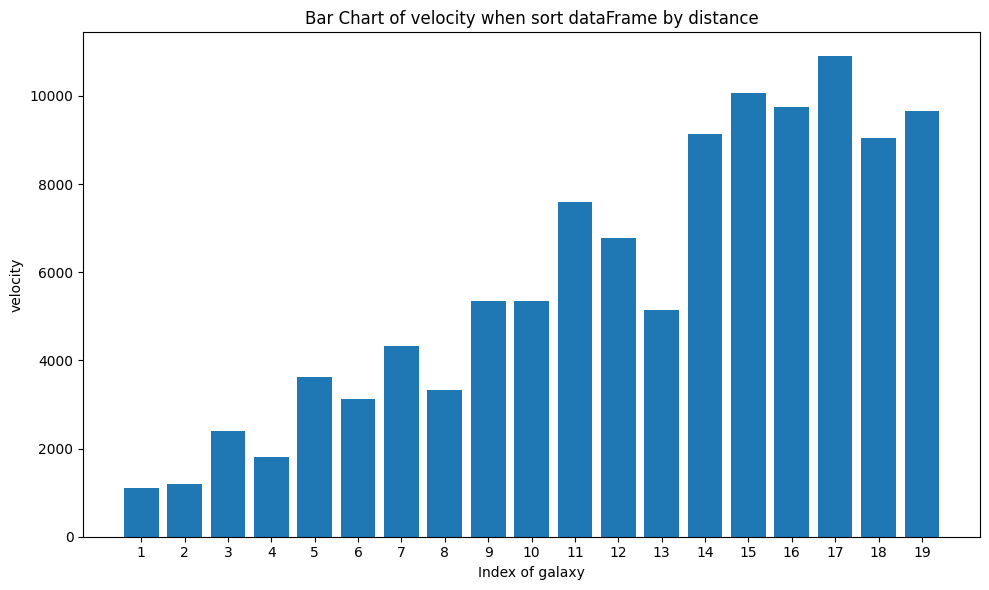

In [10]:
# plot bar chart of velocity when sort Dataframe by distance
plt.figure(figsize=(10, 6))
plt.bar(new.index, new['v'])
plt.xlabel("Index of galaxy")
plt.ylabel("velocity")
plt.title("Bar Chart of velocity when sort dataFrame by distance")
plt.xticks(range(len(new)), range(1, len(new) + 1))
plt.tight_layout()
plt.show()

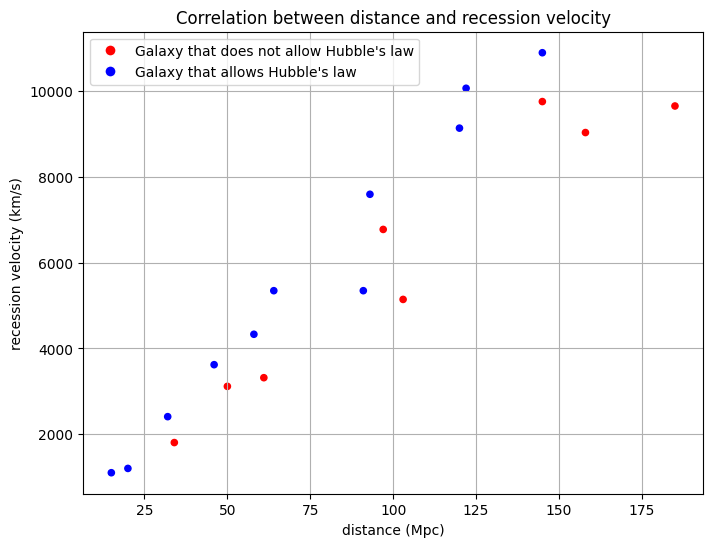

In [11]:
# make different color of galaxy i on scatter plot when galaxy i does not allow Hubble's law
D = df['d']
V = df['v']
galaxies = list(zip(D, V))
galaxies.sort()

unique_distances = sorted(set(d for d, _ in galaxies))
distance_map = {d: i + 1 for i, d in enumerate(unique_distances)}

class FenwickTree:
    def __init__(self, size):
        self.size = size
        self.tree = [float('-inf')] * (size + 1)

    def update(self, idx, value):
        while idx <= self.size:
            self.tree[idx] = max(self.tree[idx], value)
            idx += idx & -idx

    def query(self, idx):
        max_value = float('-inf')
        while idx > 0:
            max_value = max(max_value, self.tree[idx])
            idx -= idx & -idx
        return max_value

ft = FenwickTree(len(unique_distances))

colors = []
for d, v in galaxies:
    compressed_d = distance_map[d]
    max_v = ft.query(compressed_d - 1)
    # use Fenwick Tree Datastructure and greedy algorithm to optimize code from O(n^2) to O(nlogn)
    if max_v > v:
        # If Galaxy i does not allow Hubble's law, its color will be red;
        colors.append('red')
    else:
        # If Galaxy i allows Hubble's law, its color will be blue.
        colors.append('blue')
    ft.update(compressed_d, v)

original_order_colors = [colors[galaxies.index((d, v))] for d, v in zip(df['d'], df['v'])]

plt.figure(figsize=(8, 6))
plt.scatter(df['d'], df['v'], c = original_order_colors, s=20)
plt.xlabel('distance (Mpc)')
plt.ylabel('recession velocity (km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Galaxy that does not allow Hubble\'s law', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Galaxy that allows Hubble\'s law', markerfacecolor='blue', markersize=8)
]
plt.legend(handles=legend_elements)
plt.show()

Slope(H0): 65.6299463885447
Error(MSE): 1259379.1688940628
Error(H0): 5.974288841626507
Standard Error of the Slope: 5.6122455960570115


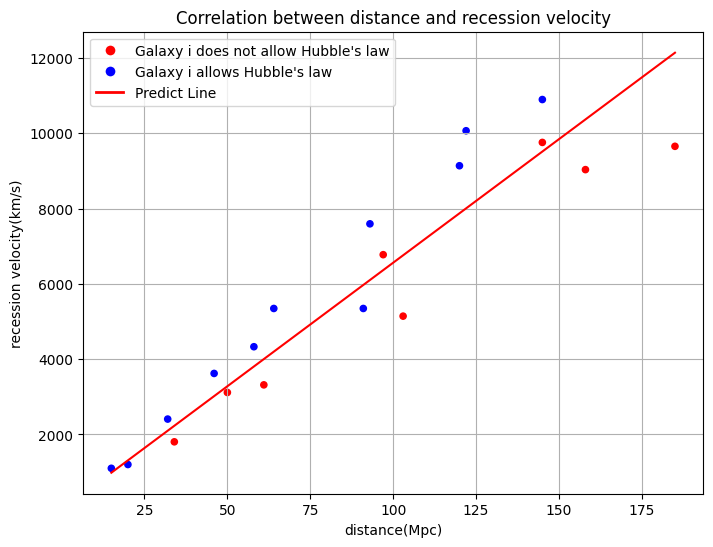

In [12]:
# do regression on making galaxy
plt.figure(figsize=(8, 6))
scatter = plt.scatter(df['d'], df['v'], c=original_order_colors, s=20)
plt.xlabel('distance(Mpc)')
plt.ylabel('recession velocity(km/s)')
plt.title('Correlation between distance and recession velocity')
plt.grid(True)

X = df[['d']].values
y = df['v'].values
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
x_range = np.linspace(df['d'].min(), df['d'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_pred, color='red', label='Predict Line')

True_Hubble = 69.8
slope = model.coef_[0]
errorMSE = mean_squared_error(y, model.predict(X))
errorH0 = abs(True_Hubble - slope) / True_Hubble * 100

residuals = y - model.predict(X)
std_err_regression = np.sqrt(np.sum(residuals**2) / (len(X) - 2))
std_err_slope = std_err_regression / np.sqrt(np.sum((X[:, 0] - np.mean(X[:, 0]))**2))

print(f"Slope(H0): {slope}")
print(f"Error(MSE): {errorMSE}")
print(f"Error(H0): {errorH0}")
print(f"Standard Error of the Slope: {std_err_slope}")

legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Galaxy i does not allow Hubble\'s law', markerfacecolor='red', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Galaxy i allows Hubble\'s law', markerfacecolor='blue', markersize=8),
    plt.Line2D([0], [0], color='red', lw=2, label='Predict Line')
]
plt.legend(handles=legend_elements)

plt.show()